In [1]:
import numpy as np
import pandas as  pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('titanic.csv' , usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [4]:
df.isnull().sum()

Survived     0
Age         86
Fare         1
dtype: int64

In [5]:
len(df['Age'])

418

In [6]:
418-86

332

In [7]:
# Random Sample Imputation Technique

In [8]:
a=df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=42)
a

27     22.5
398    22.0
89      2.0
241    45.0
68     31.0
       ... 
176    20.0
220    30.0
112    36.0
393    47.0
397    48.0
Name: Age, Length: 86, dtype: float64

In [10]:
b=df[df['Age'].isnull()].index
b

Int64Index([ 10,  22,  29,  33,  36,  39,  41,  47,  54,  58,  65,  76,  83,
             84,  85,  88,  91,  93, 102, 107, 108, 111, 116, 121, 124, 127,
            132, 133, 146, 148, 151, 160, 163, 168, 170, 173, 183, 188, 191,
            199, 200, 205, 211, 216, 219, 225, 227, 233, 243, 244, 249, 255,
            256, 265, 266, 267, 268, 271, 273, 274, 282, 286, 288, 289, 290,
            292, 297, 301, 304, 312, 332, 339, 342, 344, 357, 358, 365, 366,
            380, 382, 384, 408, 410, 413, 416, 417],
           dtype='int64')

In [11]:
def random (df,variable):
    df[variable+'_replaced']=df[variable].copy()
    a=df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=42)
    # index Postion should match
    a.index = df[df['Age'].isnull()].index
    df.loc[df['Age'].isnull(),'Age_replaced']=a

In [13]:
random(df,"Age")

In [14]:
df.isnull().sum()

Survived         0
Age             86
Fare             1
Age_replaced     0
dtype: int64

In [15]:
df[df['Age'].isnull()].head(1)

,Survived,Age,Fare,Age_replaced
10,0,NaN,7.8958,22.5


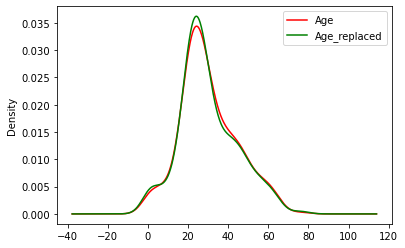

In [21]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
df['Age'].plot(kind='kde' ,color='r', label='Age')
df['Age_replaced'].plot(kind='kde',color='g',label='Age_replaced')
plt.legend(loc=-0)
plt.show()

In [22]:
df['Age'].var()

201.10669538455937

In [24]:
df["Age_replaced"].var()

204.97506477114956

In [25]:
df['Age'].std()

14.18120923562442

In [27]:
df['Age_replaced'].std()

14.316950260832423

<AxesSubplot:>

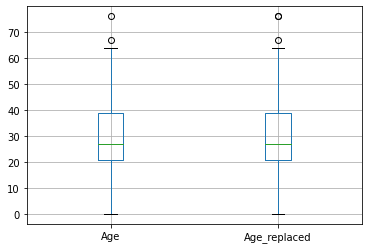

In [29]:
df[['Age','Age_replaced']].boxplot()

# Using Feature Engine

In [31]:
df=pd.read_csv('titanic.csv' , usecols=['Age','Fare','Survived'])

In [32]:
df.isnull().sum()

Survived     0
Age         86
Fare         1
dtype: int64

In [34]:
from feature_engine.imputation import RandomSampleImputer

In [35]:
ran=RandomSampleImputer()

In [36]:
ran.fit(df)

RandomSampleImputer()

In [37]:
df=ran.transform(df)

In [38]:
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [39]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64